In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({'font.size': 12})

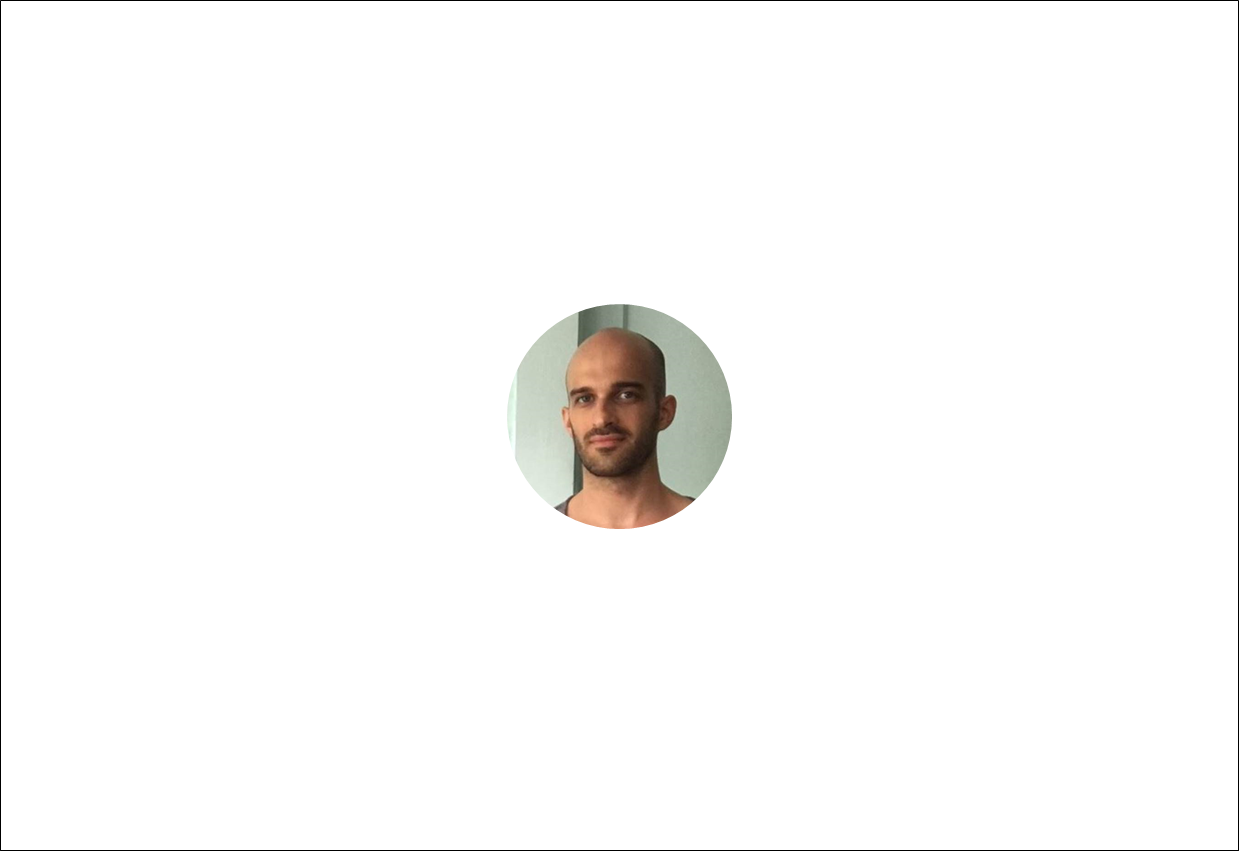

 # <center>Python Presents: Randomness, Benford, & Logarithms </center>
 ### <center>Steven  Rosa, Data Scientist at FanDuel </center>

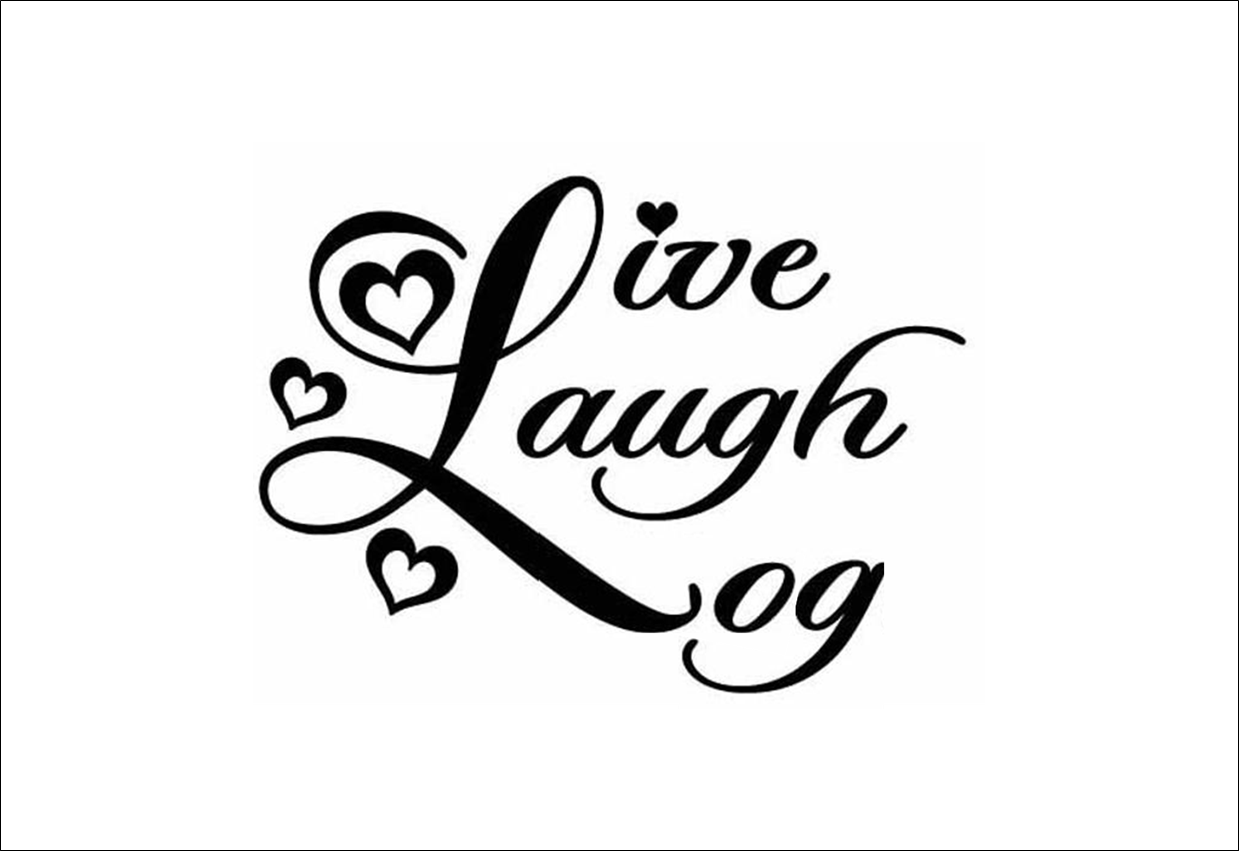

# The Right Kind of Randomness

- surface area of rivers
- numbers in a body of text
- molecular weights and specific heats
- mathematical sequences
- sports data
- death rates

More via [WolframMathWorld](http://mathworld.wolfram.com/BenfordsLaw.html)

# The Wrong Kind:

- Assigned
- Restricted

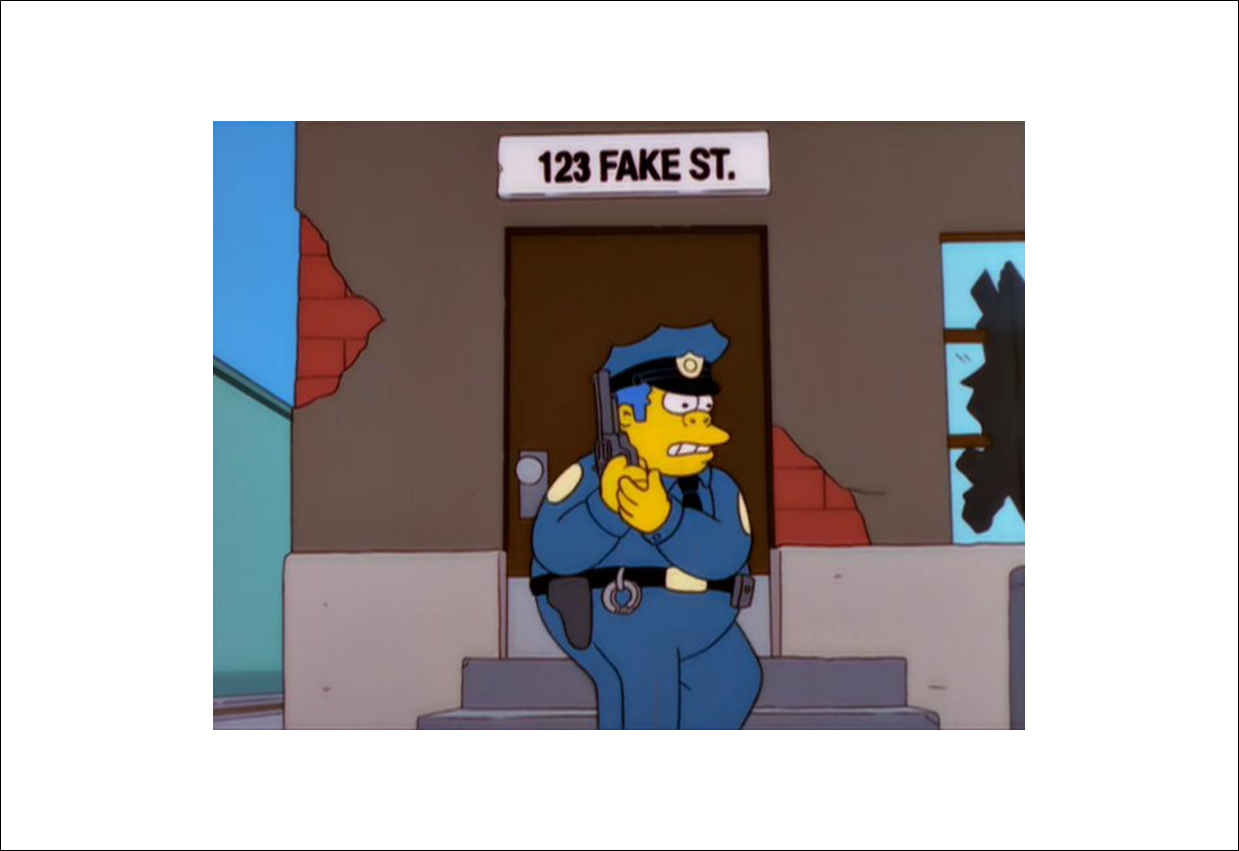

image via [Frinkiac](https://frinkiac.com/caption/S12E18/1067483)

# First Digits
## What would you expect?

In [ ]:
import numpy as np

#Random one-digit numbers
np.random.choice(np.arange(1,10), 1000)

In [107]:
import pandas as pd

#Random one-digit numbers
one_digits = pd.Series(np.random.choice(np.arange(1,10), 1000)).value_counts()

In [108]:
#Get the counts
one_digits

2    137
6    126
7    114
5    110
8    109
1    107
4    106
3     98
9     93
dtype: int64

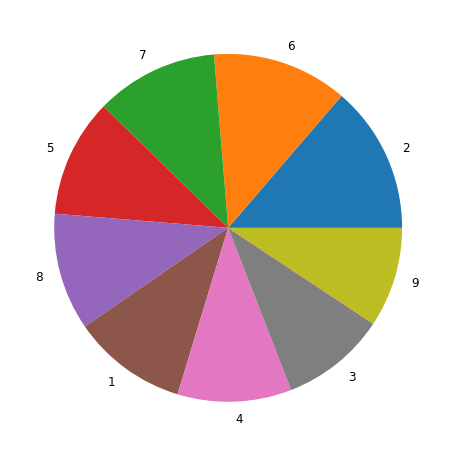

In [113]:
#Plot the counts
one_digits.plot(kind = 'pie',
                figsize = (8,8),
                label = '')
plt.show()

# Makes sense

In [77]:
#Data set from Kaggle on cost of living in various cities
living = pd.read_csv('cost_of_living.csv')
living.set_index('Unnamed: 0', inplace = True)

In [78]:
living.head()

Meal, Inexpensive Restaurant  \
Unnamed: 0                                               
Saint Petersburg, Russia                          7.34   
Istanbul, Turkey                                  4.58   
Izmir, Turkey                                     3.06   
Helsinki, Finland                                12.00   
Chisinau, Moldova                                 4.67   

                          Meal for 2 People, Mid-range Restaurant, Three-course  \
Unnamed: 0                                                                        
Saint Petersburg, Russia                                              29.35       
Istanbul, Turkey                                                      15.28       
Izmir, Turkey                                                         12.22       
Helsinki, Finland                                                     65.00       
Chisinau, Moldova                                                     20.74       

                          McMeal at McDonalds (or Equivalent Combo Meal)  \
Unnamed: 0                                                                 
Saint Petersburg, Russia                                            4.40   
Istanbul, Turkey                                                    3.82   
Izmir, Turkey                                                       3.06   
Helsinki, Finland                                                   8.00   
Chisinau, Moldova                                                   4.15   

                          Domestic Beer (0.5 liter draught)  \
Unnamed: 0                                                    
Saint Petersburg, Russia                               2.20   
Istanbul, Turkey                                       3.06   
Izmir, Turkey                                          2.29   
Helsinki, Finland                                      6.50   
Chisinau, Moldova                                      1.04   

                          Imported Beer (0.33 liter bottle)  \
Unnamed: 0                                                    
Saint Petersburg, Russia                               2.20   
Istanbul, Turkey                                       3.06   
Izmir, Turkey                                          2.75   
Helsinki, Finland                                      6.75   
Chisinau, Moldova                                      1.43   

                          Coke/Pepsi (0.33 liter bottle)  \
Unnamed: 0                                                 
Saint Petersburg, Russia                            0.76   
Istanbul, Turkey                                    0.64   
Izmir, Turkey                                       0.61   
Helsinki, Finland                                   2.66   
Chisinau, Moldova                                   0.64   

                          Water (0.33 liter bottle)   \
Unnamed: 0                                             
Saint Petersburg, Russia                        0.53   
Istanbul, Turkey                                0.24   
Izmir, Turkey                                   0.22   
Helsinki, Finland                               1.89   
Chisinau, Moldova                               0.44   

                          Milk (regular), (1 liter)  \
Unnamed: 0                                            
Saint Petersburg, Russia                       0.98   
Istanbul, Turkey                               0.71   
Izmir, Turkey                                  0.65   
Helsinki, Finland                              0.96   
Chisinau, Moldova                              0.68   

                          Loaf of Fresh White Bread (500g)  \
Unnamed: 0                                                   
Saint Petersburg, Russia                              0.71   
Istanbul, Turkey                                      0.36   
Izmir, Turkey                                         0.38   
Helsinki, Finland                                     2.27   
Chisinau, Moldova                               

In [80]:
living['school']

Unnamed: 0
Saint Petersburg, Russia     5388.86
Istanbul, Turkey             6905.43
Izmir, Turkey                4948.41
Helsinki, Finland            1641.00
Chisinau, Moldova            2679.30
                              ...   
Melbourne, Australia        12874.09
Perth, Australia            11526.08
Sydney, Australia           11933.55
Alexandria, Egypt            2132.54
Quito, Ecuador               6410.05
Name: school, Length: 160, dtype: float64

# How to get first digits?

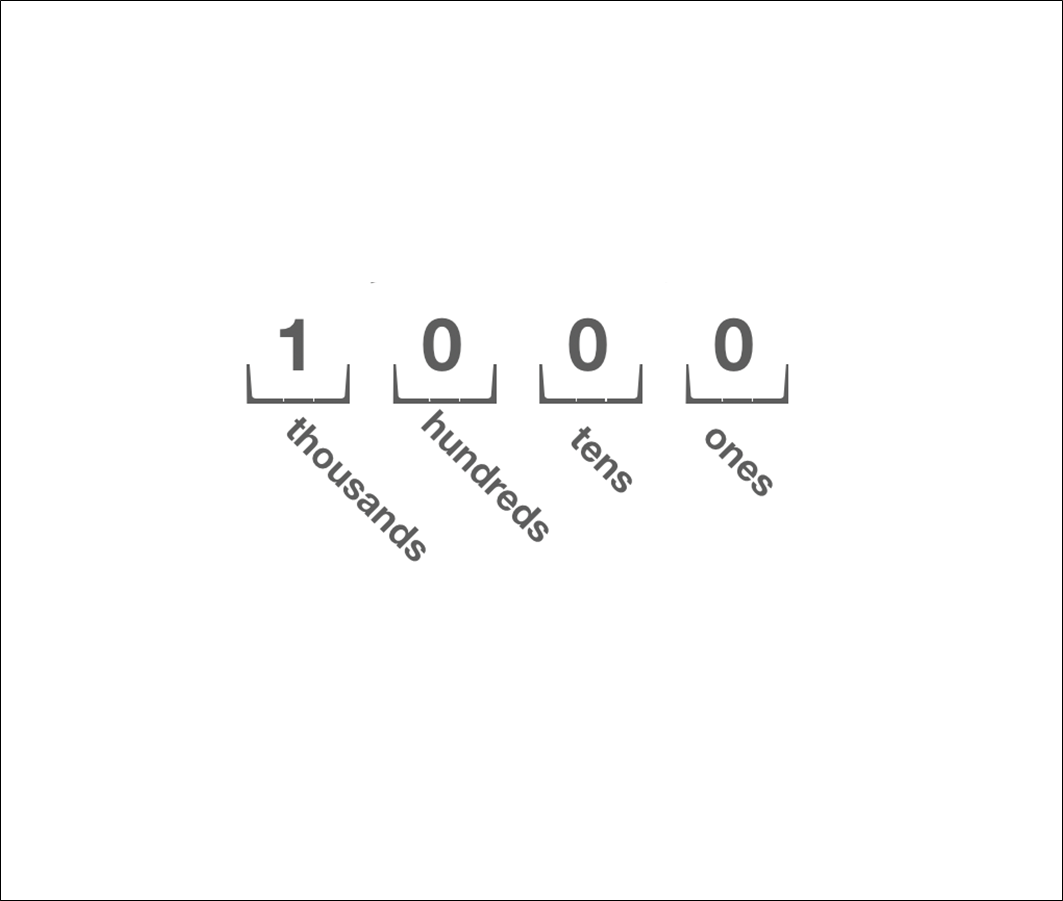

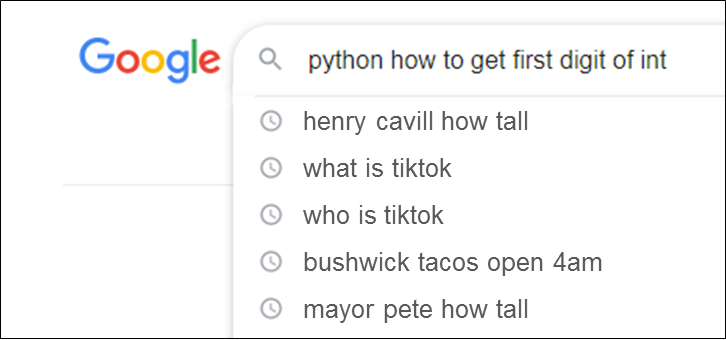

In [81]:
living['school'].astype(str).str[0]

Unnamed: 0
Saint Petersburg, Russia    5
Istanbul, Turkey            6
Izmir, Turkey               4
Helsinki, Finland           1
Chisinau, Moldova           2
                           ..
Melbourne, Australia        1
Perth, Australia            1
Sydney, Australia           1
Alexandria, Egypt           2
Quito, Ecuador              6
Name: school, Length: 160, dtype: object

In [83]:
counts = living['school'].astype(str).str[0].value_counts()
counts

1    52
2    20
3    17
4    15
5    15
7    14
6    14
8     8
9     5
Name: school, dtype: int64

In [84]:
frequencies = [f'{i}: {val / counts.sum()}' for i, val in counts.items()]
frequencies

['1: 0.325',
 '2: 0.125',
 '3: 0.10625',
 '4: 0.09375',
 '5: 0.09375',
 '7: 0.0875',
 '6: 0.0875',
 '8: 0.05',
 '9: 0.03125']

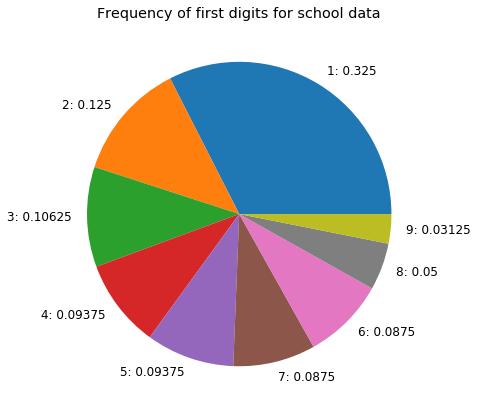

In [87]:
counts.plot(kind = 'pie', figsize = (7,7),
            labels = frequencies,
            title = 'Frequency of first digits for school data',
            label = '')
plt.show()

# Benford's Law: A Disgusting Story
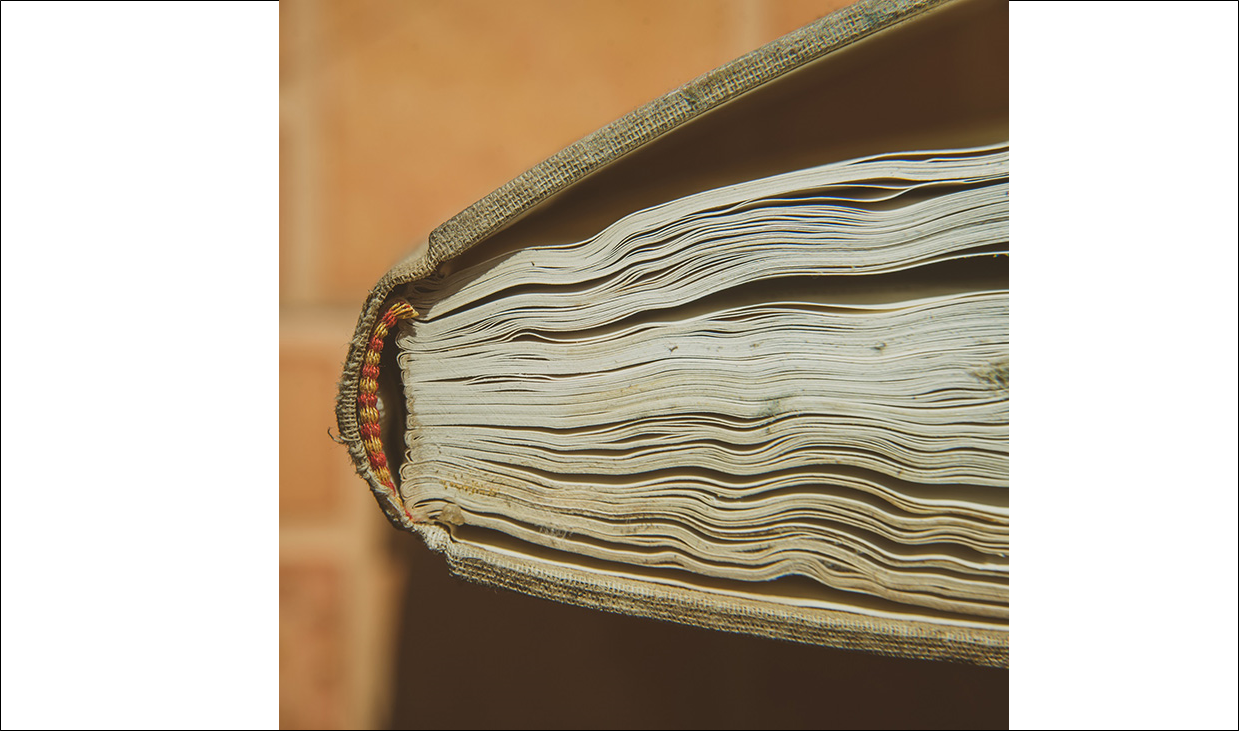

<right>image via [OSU News](https://news.okstate.edu/articles/agricultural-sciences-natural-resources/2019/gedon_caring_for_papers_after_a_flood.html)</right>

$$ P(i) = log_{10} \left(1 + \frac{1}{i} \right)$$

In [88]:
#Function to get predicted frequency of a digit under Benford's Law
def benford(i):
    return np.log10(1 + ( 1 / i))

In [ ]:
#Frequencies of digits 1 through 9 in naturally  growing distributions
predicted_frequencies = {i: round(benford(i), 4) for i in np.arange(1, 10)}

#Make labels 
labels = [f'{k}: {v}' for k,v in predicted_frequencies.items()]

#Draw plot of predicted frequencies
pd.Series(predicted_frequencies).plot(kind = 'pie',
                                      figsize = (8,8),
                                      labels = labels,
                                      title = 'Frequencies of first digits under Benford\'s Law',
                                      fontsize = 14,
                                      label = '')

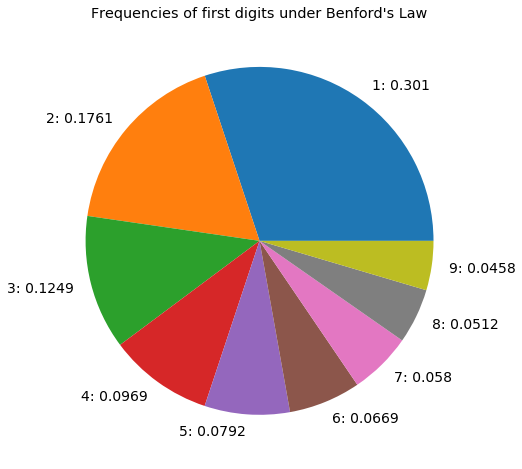

In [91]:
plt.show()

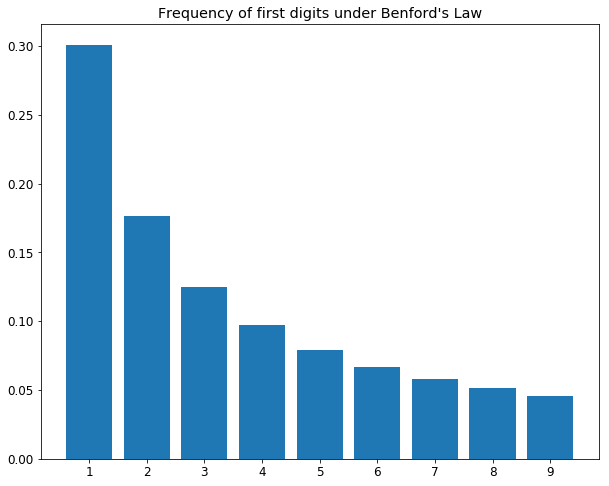

In [70]:
fig = plt.figure(figsize = (10,8))
plt.bar(predicted_frequencies.keys(), predicted_frequencies.values())
plt.xticks(list(predicted_frequencies.keys()))
plt.title('Frequency of first digits under Benford\'s Law')
plt.show()

# Logs & Pones
## (Logarithms and Exponents)
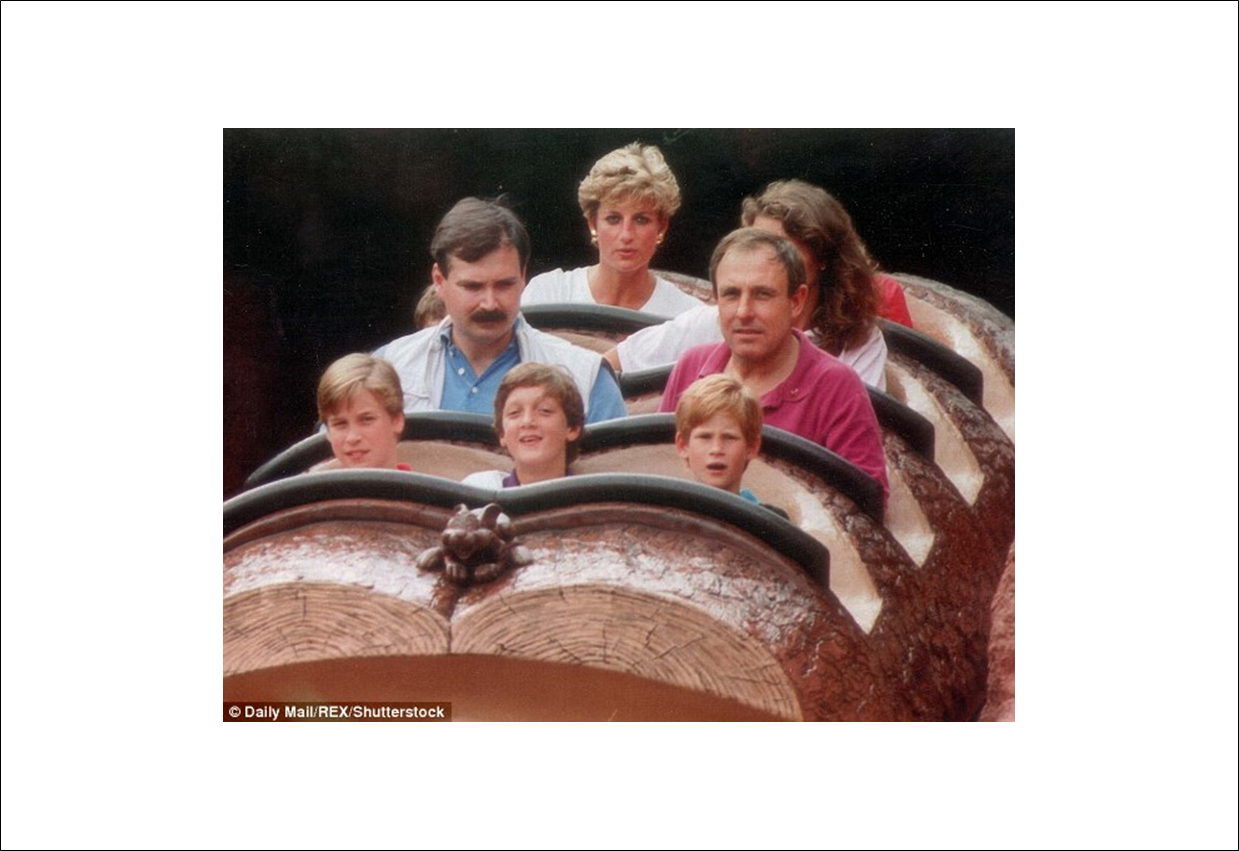

Image via [Daily Mail](https://www.dailymail.co.uk/femail/article-3585219/Prince-Harry-braves-Splash-Mountain-log-flume-time-23-years-visiting-Disney-World-Princess-Diana.html)

# What is a logarithm?

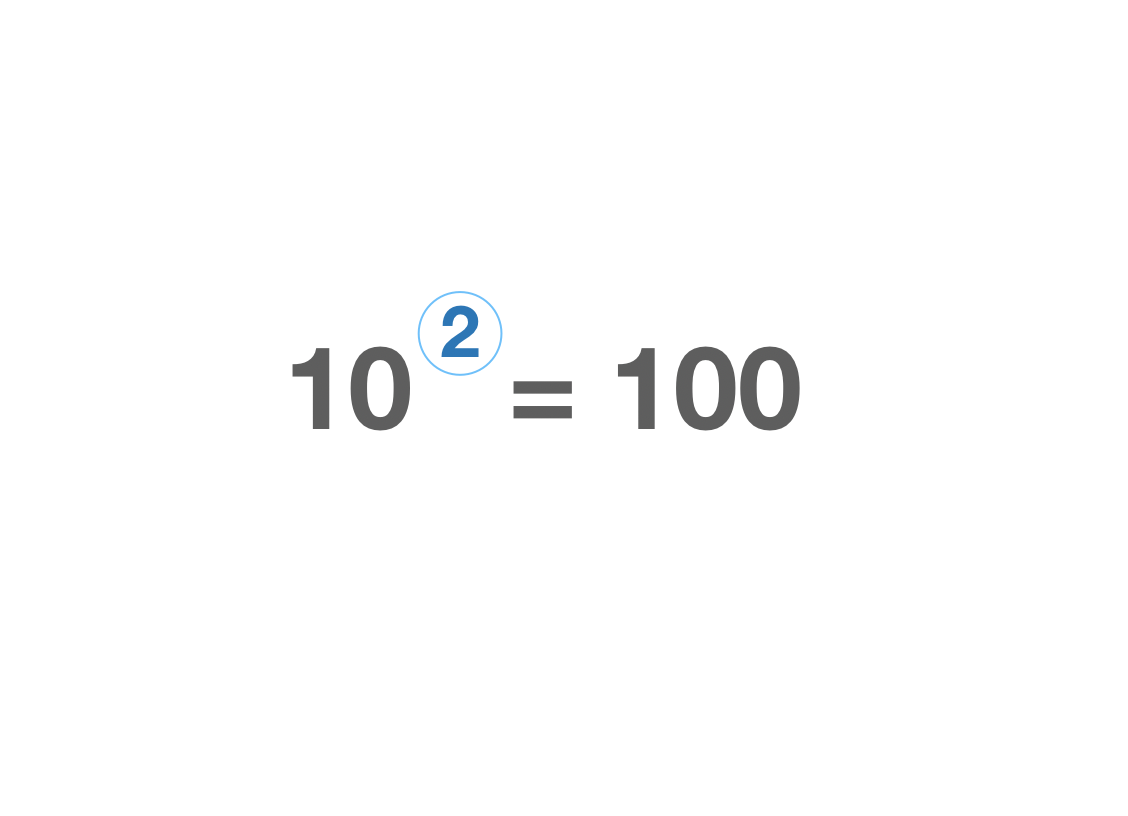

In [55]:
#Get range of y values for range of 10^x
def _10tothe(x):
    Y = np.round(10 ** x, 2)
    return Y

#Draw plot of 10^x
def plot_10tothe(x):
    #Get range of y values
    Y = _10tothe(x)
    label = f'10 ** {x[0]} thru {round(x[-1])}'
    #Draw xs and ys
    plt.plot(x, Y, color = 'g', label = label)
    #Draw a linear trend to compare
    plt.plot(x, x * 10, 'o', label = 'x * 10')
    #Just some labeling
    plt.xticks(x)
    plt.xlabel('x')
    plt.yticks(Y)
    plt.ylabel('y')
    plt.legend()
    plt.title(label)

In [60]:
#array of xs 0 to 2
x = np.arange(0, 2.1, 0.1)
_10tothe(x)

array([  1.  ,   1.26,   1.58,   2.  ,   2.51,   3.16,   3.98,   5.01,
         6.31,   7.94,  10.  ,  12.59,  15.85,  19.95,  25.12,  31.62,
        39.81,  50.12,  63.1 ,  79.43, 100.  ])

In [ ]:
#array of xs 0 to 3
x = np.arange(0, 3.1, 0.1)

In [68]:
plt.rcParams.update({'font.size': 12})

In [ ]:
#Draw plot of 10 to the 0 thru 3
fig = plt.figure(figsize = (12,10))
plt.plot(x, _10tothe(x))
plt.xticks(x)
plt.yticks(_10tothe(x))
plt.title('10 to the 0 thru 3')

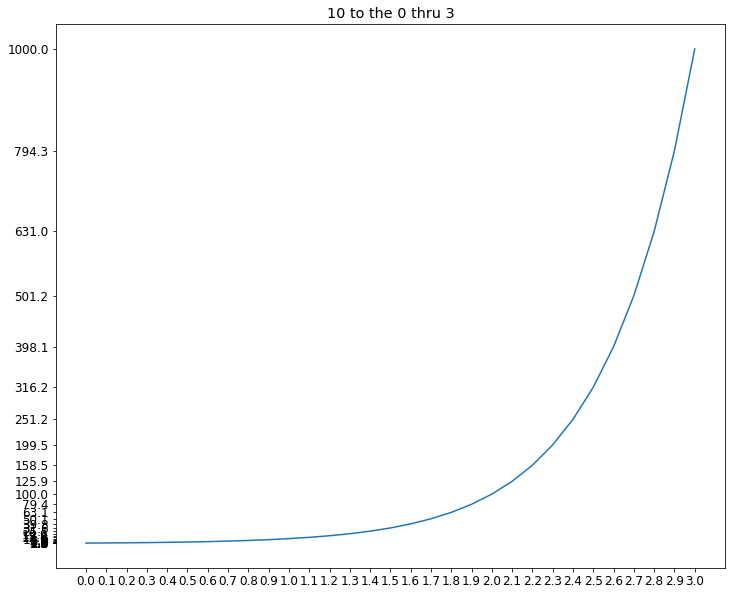

In [75]:
plt.show()

# Too much!

## What about just 10 to the 0 thru 1?

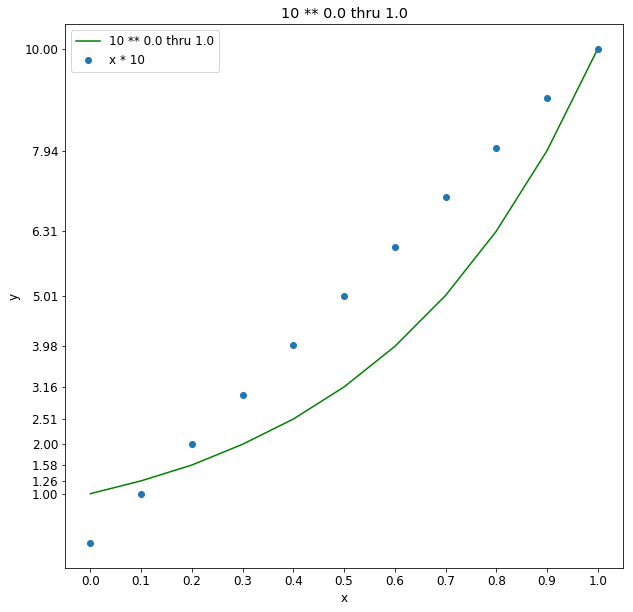

In [145]:
x = np.arange(0, 1.1, 0.1)
fig = plt.figure(figsize = (10,10))
plot_10tothe(x)

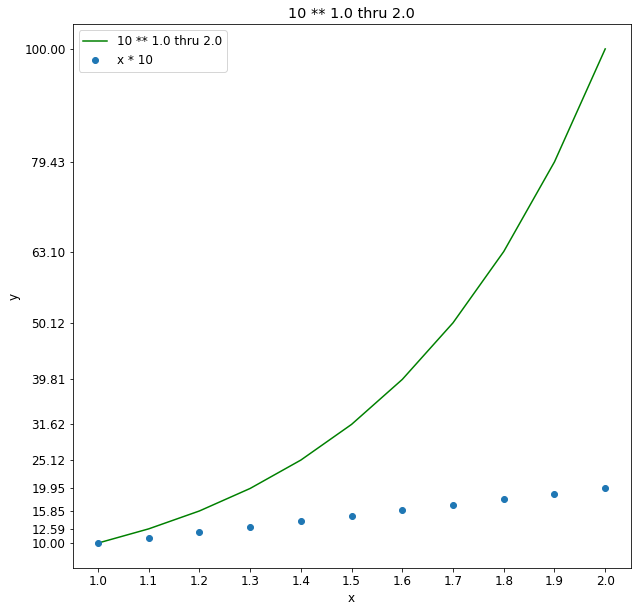

In [146]:
x = np.arange(1, 2.1, 0.1)
fig = plt.figure(figsize = (10,10))
plot_10tothe(x)

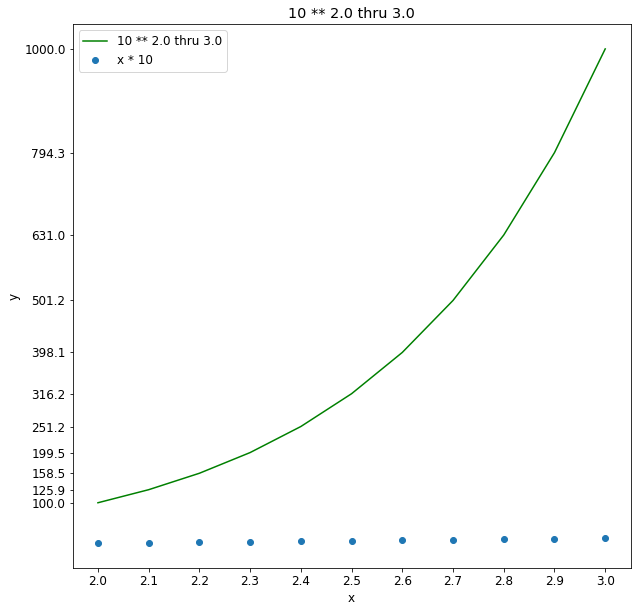

In [147]:
x = np.arange(2, 3.1, 0.1)
fig = plt.figure(figsize = (10,10))
plot_10tothe(x)

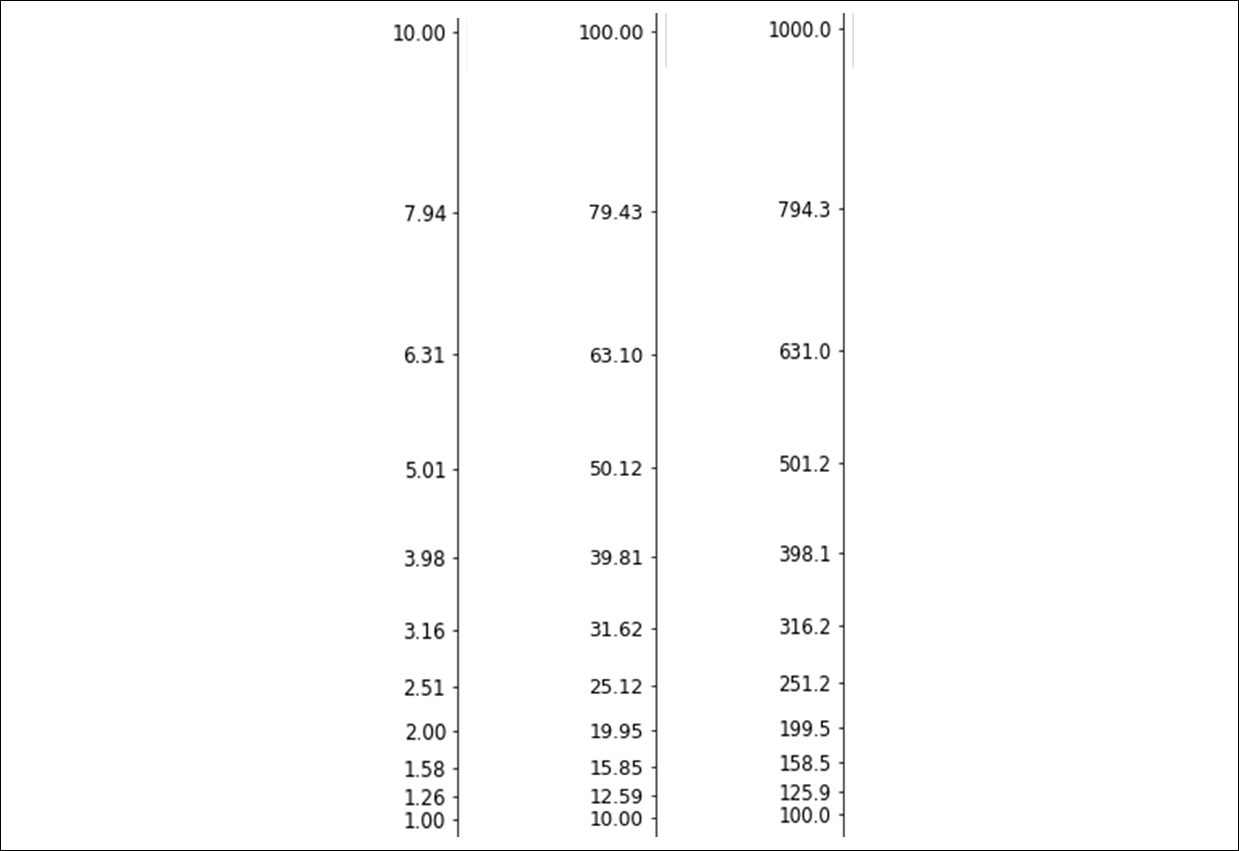

In [104]:
#Adding in a lot more data
x = np.arange(0, 1.1, 0.001)
y = _10tothe(x)
counts = pd.Series(y).astype(str).str[0].value_counts()
[f'{i}: {np.round(val / counts.sum(), 2)}' for i, val in counts.items()]

['1: 0.36',
 '2: 0.16',
 '3: 0.11',
 '4: 0.09',
 '5: 0.07',
 '6: 0.06',
 '7: 0.05',
 '8: 0.05',
 '9: 0.04']

# Why?
## Because of the 10s

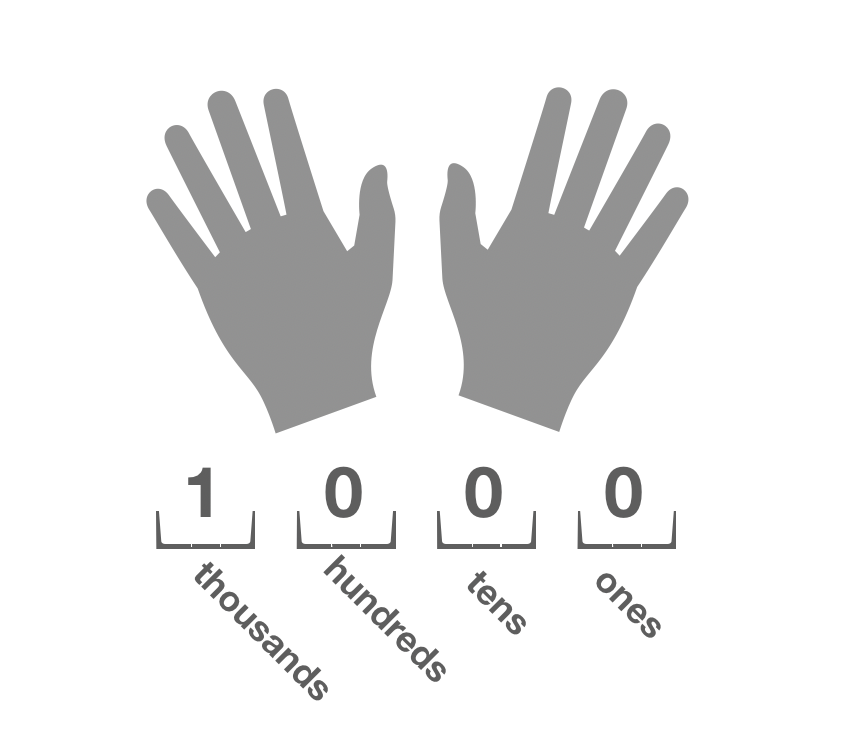

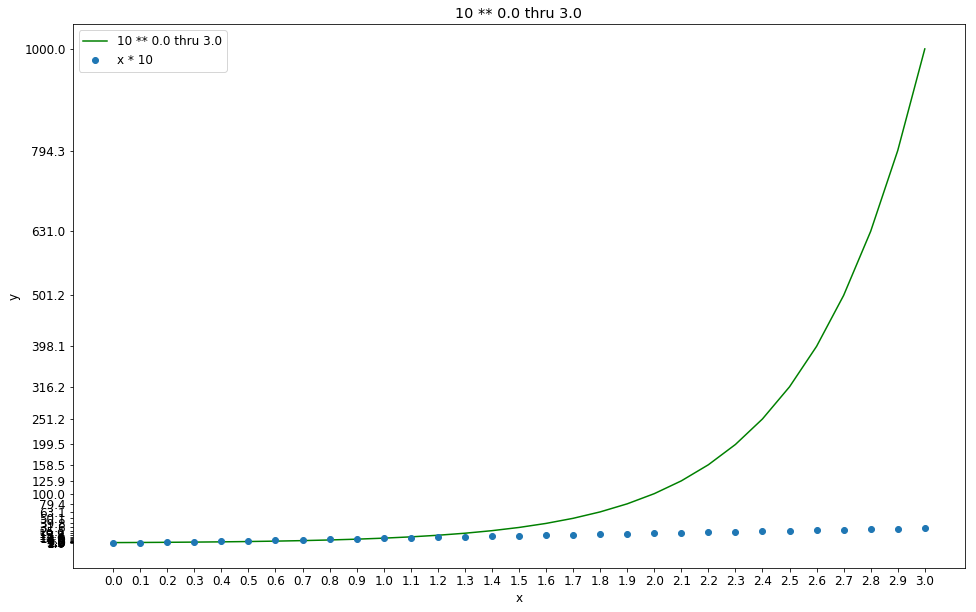

In [116]:
x = np.arange(0, 3.1, 0.1)
fig = plt.figure(figsize = (16,10))
plot_10tothe(x)

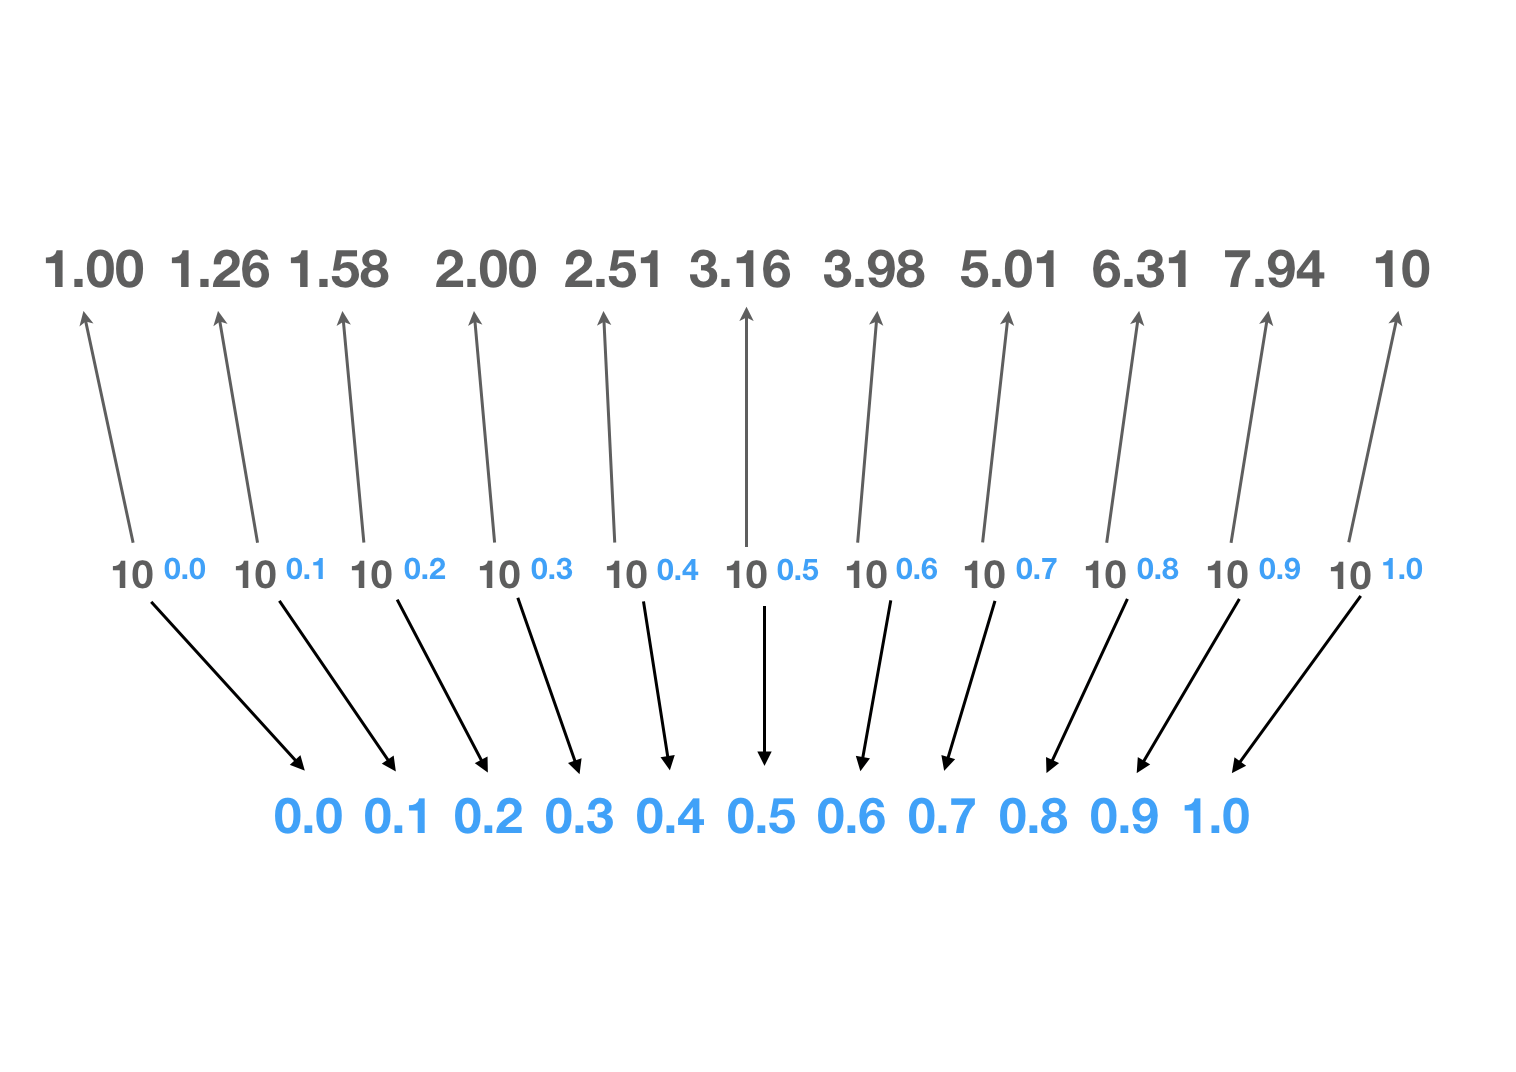

# Benford's Law in other bases

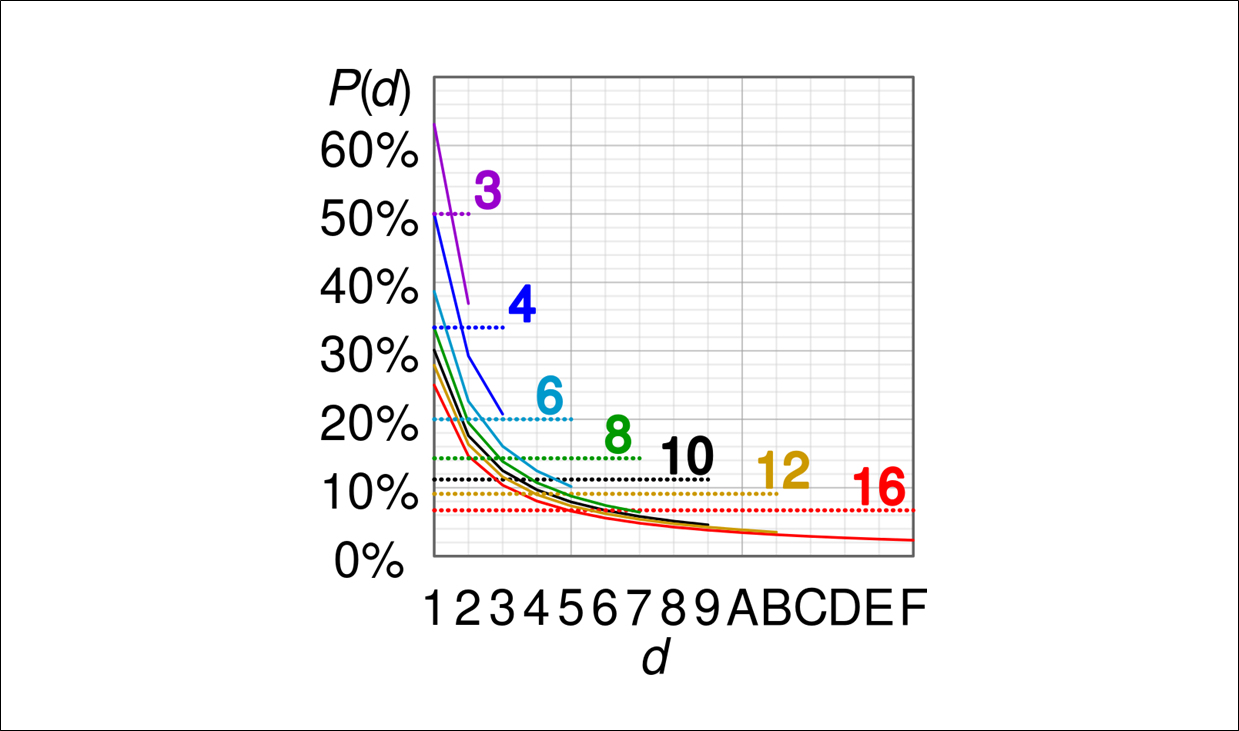

Image via [Wikipedia](https://en.wikipedia.org/wiki/Benford%27s_law#Benford's_law_in_other_bases)

# Can't fake it.

### <center> Further reading </center>
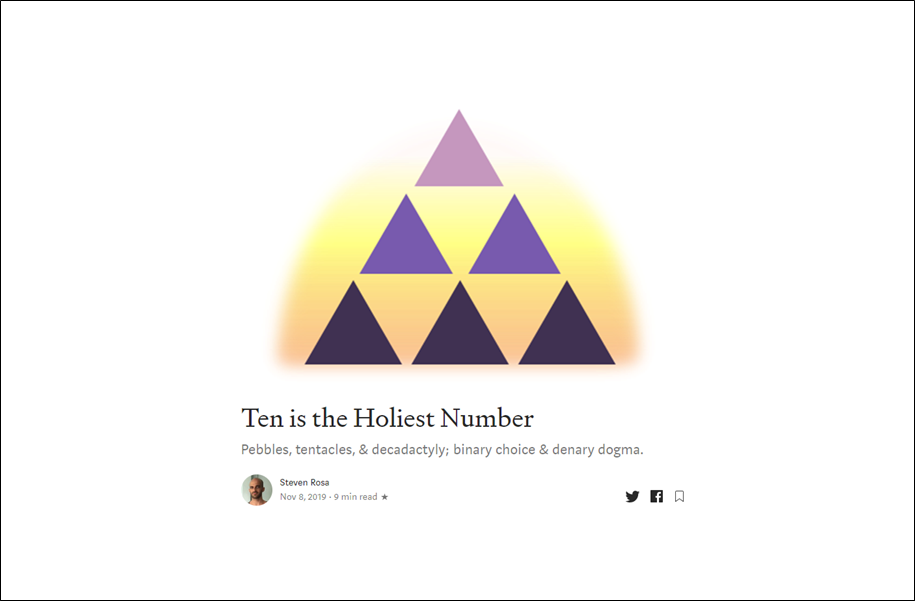

# <center>Thanques! </center>



#### <center>github /ssrosa</center>
#### <center>medium /ssrosa</center>
#### <center>linkedin /ssrosa</center>